In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

%matplotlib inline

pd.set_option("display.max_rows",101)
pd.set_option("display.max_columns",101)

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
TRAIN_DATA = pd.read_csv('# I can not disclose it now because of security')
TEST_DATA = pd.read_csv('# I can not disclose it now because of security')

train_data = TRAIN_DATA.copy()
test_data = TEST_DATA.copy()

In [4]:
subway = pd.read_csv('# I can not disclose it now because of security')
subway.head()

,station_id,latitude,longitude,subway_line,address_by_law
0,1,37.555729,126.972145,"1,4,KJ,AP",1.114012e+09
1,2,37.565624,126.976936,"1,2",1.114017e+09
2,3,37.570169,126.983099,1,1.111013e+09
3,4,37.571570,126.991895,"1,3,5",1.111016e+09
4,5,37.570988,127.001921,1,1.111016e+09


In [5]:
train_data['New_target'] = train_data['#security#'] - train_data['#security#']

In [6]:
Creditor_1st = [#security#]

Creditor_2nd = [#security#']

Creditor_3nd = [#security#]

# 개인
Private = [#security#]

In [7]:
def Creditor_class(x):

    # Creditor 1st
    for i, creditor in enumerate(x):
        if creditor in Creditor_1st:
            x[i] = '1st'

    # Creditor 2cnd
    for i, creditor in enumerate(x):
        for key_word in Creditor_2nd:
            word = re.search(key_word, creditor)
            if word != None:
                x[i] = '2nd'

    # Creditor 3nd
    for i, creditor in enumerate(x):
        for key_word in Creditor_3nd:
            word = re.search(key_word, creditor[2:])
            if word != None:
                x[i] = '3nd'

    # Private
    for i, creditor in enumerate(x):
        for key_word in Private:
            word = re.search(key_word, creditor)
            if word != None:
                x[i] = 'Private'
 

In [8]:
si_group = train_data.groupby('#security#').count()
si_sort = si_group['New_target'].rank(ascending = 1)
si_name_sort = si_sort.keys()

si_match = {}

for i in range(0, len(si_sort)):
    si_match[si_name_sort[i]] = si_sort[i]

In [9]:
#si_match

In [10]:
def gps_distance(x1, y1, x2, y2):
    from math import sin, cos, sqrt, atan2, radians # approximate radius of earth in km 

    R = 6373.0 
    lat1 = radians(x1) 
    lon1 = radians(y1) 
    lat2 = radians(x2) 
    lon2 = radians(y2) 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2 
    c = 2 * atan2(sqrt(a), sqrt(1 - a)) 
    distance = R * c
    
    return distance

def make_city_data(data):
    city_data = data.copy()
    city_data = city_data[['point.x', 'point.y', 'Hammer_price']]
    
    return city_data

def all_distance(data):
    for i in range(0, len(subway)):
        distance_list = []
        for j in range(0, len(data)):
            distance = gps_distance(data['point.y'].iloc[j], data['point.x'].iloc[j], subway['latitude'][i], subway['longitude'][i])
            distance_list.append(distance)
        if i == 0:
            distance_data = pd.DataFrame({'distance'+str(i) : distance_list})
        else:
            new_distance_data = pd.DataFrame({'distance'+str(i) : distance_list})
            distance_data = pd.concat([distance_data, new_distance_data], axis=1, sort=False)
    return distance_data

def make_distance_feature(distancedata, data):
    distance_under_1km = []
    minimum_distance = []
    
    for i in range(0, len(distancedata)):
        distance_under_1km.append((distancedata.iloc[i] < 1).sum())
        minimum_distance.append(distancedata.iloc[i].min())

    data['distance_under_1km'] = pd.DataFrame({'distance_under_1km' : distance_under_1km})
    data['minimum_distance'] = pd.DataFrame({'minimum_distance' : minimum_distance})
    
        
    return data.head()


In [11]:
haeundae_lat = 35.1052 
haeundae_lon = 129.1043

busan_lat = 35.115486
busan_lon = 129.042237

gangnam_lat = 37.498061
gangnam_lon = 127.027632

cityhall_lat = 37.565861
cityhall_lon = 126.976947

In [12]:
def distance_from_station(station_name,station_lat1, station_lon1, station_lat2, station_lon2, data):
    distance = []
    for i in range(0, len(data)):
        if data.iloc[i]['addr_do'] == '#security#':
            dis = gps_distance(station_lat1, station_lon1, data.iloc[i]['point.y'], data.iloc[i]['point.x'])
            distance.append(dis)
        else:
            dis = gps_distance(station_lat2, station_lon2, data.iloc[i]['point.y'], data.iloc[i]['point.x'])
            distance.append(dis)
    data['distance_from_' + station_name] = pd.DataFrame({'distance_from_station' : distance})
    return data.head(3)

In [13]:
def data_preprocessing(processed_data):
    #New_target
    processed_data['New_target'] = processed_data['#security#'] - processed_data['#security#']

    #date
    processed_data['#security#'] = processed_data['#security#'].apply(lambda x: pd.to_datetime(str(x),format='%Y%m%d %H:%M:%S.%f'))
    processed_data['#security#'] = processed_data['#security#'].apply(lambda x: pd.to_datetime(str(x),format='%Y%m%d %H:%M:%S.%f'))
    
    processed_data = processed_data.drop(['#security#','#security#', '#security#'],axis=1)
    
    processed_data['#security#'] = processed_data['#security#'] - processed_data['#security#']
    
    processed_data['#security#'] = processed_data['#security#'].apply(lambda x: re.sub(' days', '', str(x)))
    processed_data['#security#'] = processed_data['#security#'].apply(lambda x: str(x)[:-8])
    processed_data['#security#'] = processed_data['#security#'].astype(np.int64)
   
    # #security#
    processed_data['#security#'] = processed_data['#security#'].map({'#security#': 0, '#security#': 1})
    
    # #security#
    dummies = pd.get_dummies(processed_data['#security#'])
    processed_data['#security#'] = dummies['#security#']
    processed_data['#security#'] = dummies['#security#']
    processed_data['#security#'] = dummies['#security#']
    processed_data = processed_data.drop(["#security#"],axis=1)
    
    # #security#
    processed_data['#security#'] = processed_data['#security#'].map({'N': 1, 'Y': 0})
    
    # #security#
    processed_data = processed_data.drop(['#security#'],axis=1)
    
    # #security#
    processed_data = processed_data.drop(["#security#"],axis=1)
    
    # #security#
    #security#_class(processed_data['#security#'])
    processed_data['#security#'] = processed_data['#security#'].apply(lambda y: 'Coroperation' if (y != '1st') & (y != '2nd') & (y != '3nd') & (y != 'Private') else y)
    dummies = pd.get_dummies(processed_data['#security#'])
    processed_data['#security#_1st'] = dummies['1st']
    processed_data['#security#_2nd'] = dummies['2nd']
    processed_data['#security#_3nd'] = dummies['3nd']
    processed_data['#security#_Coroperation'] = dummies['Coroperation']
    processed_data['#security#_Private'] = dummies['Private']
    processed_data = processed_data.drop(["#security#"],axis=1)
    
    # #security#
    #dummies = pd.get_dummies(processed_data['#security#'])
    #processed_data = pd.concat([processed_data, dummies], axis=1)
    processed_data['#security#_rank'] = processed_data['#security#'].map(si_match)
    processed_data = processed_data.drop(["#security#"],axis=1)
    
    # #security#
    processed_data = processed_data.drop(['#security#', '#security#'],axis=1)
    
    # #security#
    processed_data.#security# = le.fit_transform(processed_data.#security#)
    
    # #security#, #security#, etc
    processed_data = processed_data.drop(['#security#',#security#bunji2', #security#etc'],axis=1)
    
    # #security#
    processed_data.#security# = le.fit_transform(processed_data.#security#)
    
    # #security#
    processed_data = processed_data.drop(['#security#'],axis=1)
    
    # #security#, #security#, #security#2
    processed_data = processed_data.drop(['#security#1','#security#2', '#security#'],axis=1)
    
    # #security#
    processed_data = processed_data.drop(['#security#'],axis=1)
    
    # #security#, #security#
    # make distance data 1
    make_distance_feature(all_distance(make_city_data(processed_data)), processed_data)
    
    # make distance data 2
    distance_from_station('Haeundae_or_Gangnam', haeundae_lat, haeundae_lon, gangnam_lat, gangnam_lon, processed_data)

    # floor
    processed_data['#security#'] = processed_data['#security#'] + processed_data['#security#']

    # addr_si
    processed_data[#security#do'] = processed_data['addr_do'].map({'#security#': 0, '#security#': 1})
    
    # building and land
    processed_data['#security#'] = processed_data['#security#'] - processed_data['#security#']
    processed_data['#security#'] = processed_data['#security#'] - processed_data['#security#']
    
    return processed_data


In [14]:
train = data_preprocessing(train_data)
test = data_preprocessing(test_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [15]:
train['#security#'][318] = 13
train['#security#'][1383] = 14

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
test['#security#'][156] = 3
test['#security#'][540] = 6
test['#security#'][627] = 3
test['#security#'][672] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anac

In [17]:
TEST = test.copy()
TRAIN = train.copy()

In [18]:
TEST_auction_key = TEST['#security#']
#TEST_auction_key

In [19]:
TRAIN["DIFF_app_min"] = TRAIN["#security#"]- TRAIN["#security#"]
TEST["DIFF_app_min"] = TEST["#security#"]- TEST["#security#"]

In [20]:
TRAIN["DIFF_Min_Claim"] = TRAIN["#security#"] - TRAIN["#security#"]
TEST["DIFF_Min_Claim"] = TEST["#security#"] - TEST["#security#"]

In [2]:
#TRAIN.info()

In [3]:
#TRAIN.describe()

In [5]:
#corr_mat = TRAIN.corr()
#corr_mat['New_target'].sort_values(ascending = False)

In [25]:
busan_train = TRAIN[TRAIN['#security#'] == 0]
seoul_train = TRAIN[TRAIN['#security#'] == 1]
busan_test = TEST[TEST['#security#'] == 0]
seoul_test = TEST[TEST['#security#'] == 1]

In [26]:
features = ['#security#' ,'#security#']

In [27]:
features_drop = [#security#]

In [29]:
from sklearn.model_selection import train_test_split
busan_train_y = busan_train["New_target"].values
#busan_train_X = busan_train[features]
busan_train_X = busan_train.drop(features_drop, axis = 1)

bt_X_train, bt_X_test, bt_y_train, bt_y_test = train_test_split(busan_train_X, busan_train_y, test_size=0.3, random_state=42)
bt_min = bt_X_test['#security#']
bt_ham = bt_X_test['#security#']

bt_X_train = bt_X_train.drop(['#security#', '#security#'], axis = 1)
bt_X_test = bt_X_test.drop(['#security#', '#security#'], axis = 1)

In [6]:
#bt_X_train.columns

In [31]:
from sklearn.model_selection import train_test_split
seoul_train_y = seoul_train["New_target"].values
#seoul_train_X = seoul_train[features]
seoul_train_X = seoul_train.drop(features_drop, axis = 1)

st_X_train, st_X_test, st_y_train, st_y_test = train_test_split(seoul_train_X, seoul_train_y, test_size=0.3, random_state=42)

st_min = st_X_test['#security#']
st_ham = st_X_test['#security#']

st_X_train = st_X_train.drop(['#security#', '#security#'], axis = 1)
st_X_test = st_X_test.drop(['#security#', '#security#'], axis = 1)

In [32]:
features_drop = [#security#']

In [33]:
#seoul_test_X = seoul_test[features]
seoul_test_X = seoul_test.drop(features_drop, axis = 1)

In [34]:
#busan_test_X = busan_test[features]
busan_test_X = busan_test.drop(features_drop, axis = 1)

In [7]:
#busan_test_X.columns

In [36]:
from xgboost import XGBRegressor

xg_rg1 = XGBRegressor(n_jobs= -1)
xg_rg1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [37]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# xg_rg1_pipe = Pipeline([
#             #("scaler", StandardScaler()),
#             ("xg_rg1", xg_rg1),
# ])

# param_grid = [
#         {'xg_rg1__base_score': [0.5,0.55,0.6,0.65,0.7],
#          'xg_rg1__max_depth': [2,3,4,5], 
#          'xg_rg1__n_estimators' : [10,50,70,100],
#          'xg_rg1__booster' : ['gbtree', 'gblinear'],
#          #'xg_rg2__gamma' : [0, 0.1, 0.2, 0.5, 1],
#          'xg_rg1__learning_rate' : [0.5, 0.3, 0.2, 0.1, 0.01, 0.001]
#         },
#     ]

# xg_grid_search = GridSearchCV(xg_rg1_pipe, param_grid, cv=5,
#                           scoring="neg_mean_squared_error")

# xg_grid_search.fit(seoul_train_X,seoul_train_y)

# cvres = xg_grid_search.cv_results_

# for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(acc, params)

# print (xg_grid_search.best_params_)
# print (xg_grid_search.best_score_)

In [38]:
from xgboost import XGBRegressor

xg_rg2 = XGBRegressor(n_jobs= -1)
xg_rg2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [39]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# xg_rg2_pipe = Pipeline([
#             #("scaler", StandardScaler()),
#             ("xg_rg2", xg_rg2),
# ])

# param_grid = [
#         {'xg_rg2__base_score': [0.5,0.55,0.6,0.65,0.7],
#          'xg_rg2__max_depth': [2,3,4,5], 
#          'xg_rg2__n_estimators' : [10,50,70,100],
#          'xg_rg2__booster' : ['gbtree', 'gblinear'],
#          #'xg_rg2__gamma' : [0, 0.1, 0.2, 0.5, 1],
#          'xg_rg2__learning_rate' : [0.5, 0.3, 0.2, 0.1, 0.01, 0.001]
#         },
#     ]

# xg_grid_search = GridSearchCV(xg_rg2_pipe, param_grid, cv=5,
#                           scoring="neg_mean_squared_error")

# xg_grid_search.fit(busan_train_X, busan_train_y)

# cvres = xg_grid_search.cv_results_

# for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(acc, params)

# print (xg_grid_search.best_params_)
# print (xg_grid_search.best_score_)

In [40]:
xg_rg1 = XGBRegressor(n_jobs= -1, base_score= 0.65, booster= 'gbtree',learning_rate= 0.2, max_depth= 6, n_estimators=500)
xg_rg1

XGBRegressor(base_score=0.65, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [41]:
xg_rg2 = XGBRegressor(n_jobs= -1, base_score= 0.7, booster= 'gbtree', learning_rate= 0.2, max_depth= 4, n_estimators= 500)
xg_rg2

XGBRegressor(base_score=0.7, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [42]:
xg_rg1.fit(st_X_train, st_y_train)

XGBRegressor(base_score=0.65, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [43]:
xg_rg2.fit(bt_X_train, bt_y_train)

XGBRegressor(base_score=0.7, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [44]:
margin = xg_rg1.predict(st_X_test)
Full_predict_value1 = margin+ st_min
from sklearn.metrics import mean_squared_error
mean_squared_error(Full_predict_value1, st_ham)**0.5

75687406.94432682

In [45]:
margin = xg_rg2.predict(bt_X_test)
Full_predict_value2 = margin+ bt_min
from sklearn.metrics import mean_squared_error
mean_squared_error(Full_predict_value2, bt_ham)**0.5

25327115.729617085

In [46]:
### lgb

In [47]:
import lightgbm as lgb

lgb_rg1 = lgb.LGBMRegressor(n_jobs=-1)
lgb_rg1

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [48]:
import lightgbm as lgb

lgb_rg2 = lgb.LGBMRegressor(n_jobs=-1)
lgb_rg2

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [49]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# lgb_rg1_pipe = Pipeline([
#             #("scaler", StandardScaler()),
#             ("lgb_rg1", lgb_rg1),
# ])

# param_grid = [
#         {'lgb_rg1__boosting_type': ['gbdt', 'dart'],
#          'lgb_rg1__max_bin' : [2,5,10,50, 100],
#          'lgb_rg1__learning_rate' : [0.3, 0.5, 0.1, 0.01],
#          'lgb_rg1__num_leaves' : [10, 20, 50, 100, 200]
#         },
#     ]

# lgb_grid_search = GridSearchCV(lgb_rg1_pipe, param_grid, cv=5,
#                           scoring="neg_mean_squared_error")

# lgb_grid_search.fit(seoul_train_X, seoul_train_y)

# cvres = lgb_grid_search.cv_results_

# for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(acc, params)

# print (lgb_grid_search.best_params_)
# print (lgb_grid_search.best_score_)

In [50]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# lgb_rg2_pipe = Pipeline([
#             #("scaler", StandardScaler()),
#             ("lgb_rg2", lgb_rg2),
# ])

# param_grid = [
#         {'lgb_rg2__boosting_type': ['gbdt', 'dart'],
#          'lgb_rg2__max_bin' : [2,5,10,50, 100],
#          'lgb_rg2__learning_rate' : [0.3, 0.5, 0.1, 0.01],
#          'lgb_rg2__num_leaves' : [10, 20, 50, 100, 200]
#         },
#     ]

# lgb_grid_search = GridSearchCV(lgb_rg2_pipe, param_grid, cv=5,
#                           scoring="neg_mean_squared_error")

# lgb_grid_search.fit(busan_train_X, busan_train_y)

# cvres = lgb_grid_search.cv_results_

# for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(acc, params)

# print (lgb_grid_search.best_params_)
# print (lgb_grid_search.best_score_)

In [51]:
lgb_rg1 = lgb.LGBMRegressor(n_jobs=-1, boosting_type= 'dart', learning_rate= 0.1, max_bin = 1000, num_leaves= 50,
                            num_iterations=1000, n_estimators=1000)
lgb_rg1

LGBMRegressor(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_bin=1000,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=1000, n_jobs=-1,
       num_iterations=1000, num_leaves=50, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [52]:
lgb_rg2 = lgb.LGBMRegressor(n_jobs=-1, boosting_type= 'dart', learning_rate= 0.1, max_bin = 1000, num_leaves= 50,
                            num_iterations=1000, n_estimators=1000)
lgb_rg2

LGBMRegressor(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_bin=1000,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=1000, n_jobs=-1,
       num_iterations=1000, num_leaves=50, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [53]:
lgb_rg1.fit(st_X_train, st_y_train)

C:\Users\pioo0\AppData\Roaming\Python\Python36\site-packages\lightgbm\engine.py:116: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMRegressor(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_bin=1000,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=1000, n_jobs=-1,
       num_iterations=1000, num_leaves=50, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [54]:
lgb_rg2.fit(bt_X_train, bt_y_train)

C:\Users\pioo0\AppData\Roaming\Python\Python36\site-packages\lightgbm\engine.py:116: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMRegressor(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_bin=1000,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=1000, n_jobs=-1,
       num_iterations=1000, num_leaves=50, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [55]:
margin = lgb_rg1.predict(st_X_test)
Full_predict_value1 = margin+ st_min
from sklearn.metrics import mean_squared_error
mean_squared_error(Full_predict_value1, st_ham)**0.5

75939858.54981346

In [56]:
margin = lgb_rg2.predict(bt_X_test)
Full_predict_value2 = margin+ bt_min
from sklearn.metrics import mean_squared_error
mean_squared_error(Full_predict_value2, bt_ham)**0.5

24920455.419489603

In [110]:
from sklearn.ensemble import RandomForestRegressor
rf_rg1 = RandomForestRegressor(n_jobs= - 1, max_depth = 3)
rf_rg1

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [111]:
rf_rg1.fit(st_X_train, st_y_train)

C:\Users\pioo0\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [112]:
margin = rf_rg1.predict(st_X_test)
Full_predict_value1 = margin+ st_min
from sklearn.metrics import mean_squared_error
mean_squared_error(Full_predict_value1, st_ham)**0.5

68568383.39869015

In [136]:
from sklearn.svm import LinearSVR
hu = LinearSVR()
hu

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [137]:
hu.fit(st_X_train, st_y_train)

C:\Users\pioo0\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [138]:
margin = hu.predict(st_X_test)
Full_predict_value1 = margin+ st_min
from sklearn.metrics import mean_squared_error
mean_squared_error(Full_predict_value1, st_ham)**0.5

79725611.03976181

In [200]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense , BatchNormalization, Activation
from keras.optimizers import Adam
from keras.utils import plot_model

from IPython.display import Image

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 80)                400       
_________________________________________________________________
batch_normalization_14 (Batc (None, 80)                320       
_________________________________________________________________
activation_26 (Activation)   (None, 80)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 20)                1620      
_________________________________________________________________
activation_27 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 21        
Total params: 2,361
Trainable params: 2,201
Non-trainable params: 160
_________________________________________________________________


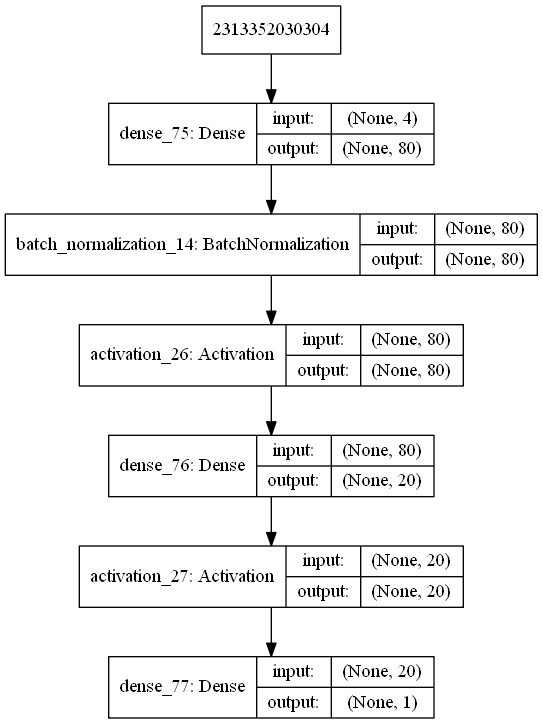

In [241]:
model=Sequential()
model.add(Dense(80, input_dim=st_X_train.shape[1]))
model.add(BatchNormalization())
model.add(Activation(activation= 'relu'))
model.add(Dense(20))
model.add(Activation(activation= 'relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
              optimizer=Adam(lr=0.01), metrics=['mse'])

model.summary()
plot_model(model, show_shapes=True)
Image('model.png')

In [242]:
history = model.fit(st_X_train, st_y_train, epochs = 200, batch_size= 8, validation_split = 0.2)

Train on 695 samples, validate on 174 samples
Epoch 1/200
695/695 [==============================] - 3s 5ms/step - loss: 13488715090336718.0000 - mean_squared_error: 13488715090336718.0000 - val_loss: 11498558657074330.0000 - val_mean_squared_error: 11498558657074330.0000
Epoch 2/200
695/695 [==============================] - 0s 515us/step - loss: 13488132716525022.0000 - mean_squared_error: 13488132716525022.0000 - val_loss: 11497130808772820.0000 - val_mean_squared_error: 11497130808772820.0000
Epoch 3/200
695/695 [==============================] - 0s 668us/step - loss: 13484864737900708.0000 - mean_squared_error: 13484864737900708.0000 - val_loss: 11491854916611296.0000 - val_mean_squared_error: 11491854916611296.0000
Epoch 4/200
695/695 [==============================] - 1s 722us/step - loss: 13474034370118244.0000 - mean_squared_error: 13474034370118244.0000 - val_loss: 11472691537731866.0000 - val_mean_squared_error: 11472691537731866.0000
Epoch 5/200
695/695 [===================

695/695 [==============================] - ETA: 0s - loss: 6943854787022653.0000 - mean_squared_error: 6943854787022653.00 - 0s 652us/step - loss: 6803190950382325.0000 - mean_squared_error: 6803190950382325.0000 - val_loss: 6270239200187545.0000 - val_mean_squared_error: 6270239200187545.0000
Epoch 72/200
695/695 [==============================] - 0s 676us/step - loss: 6884404800800818.0000 - mean_squared_error: 6884404800800818.0000 - val_loss: 6250234148106758.0000 - val_mean_squared_error: 6250234148106758.0000
Epoch 73/200
695/695 [==============================] - 0s 656us/step - loss: 6809805592436040.0000 - mean_squared_error: 6809805592436040.0000 - val_loss: 6203455411524761.0000 - val_mean_squared_error: 6203455411524761.0000
Epoch 74/200
695/695 [==============================] - 0s 597us/step - loss: 6730021948939522.0000 - mean_squared_error: 6730021948939522.0000 - val_loss: 6142379931374368.0000 - val_mean_squared_error: 6142379931374368.0000
Epoch 75/200
695/695 [=====

Epoch 107/200
695/695 [==============================] - 0s 616us/step - loss: 6429963939160453.0000 - mean_squared_error: 6429963939160453.0000 - val_loss: 6017393424871189.0000 - val_mean_squared_error: 6017393424871189.0000
Epoch 108/200
695/695 [==============================] - 0s 696us/step - loss: 6501838813656119.0000 - mean_squared_error: 6501838813656119.0000 - val_loss: 5747624956965005.0000 - val_mean_squared_error: 5747624956965005.0000
Epoch 109/200
695/695 [==============================] - 0s 662us/step - loss: 6462586051176864.0000 - mean_squared_error: 6462586051176864.0000 - val_loss: 5914073534239897.0000 - val_mean_squared_error: 5914073534239897.0000
Epoch 110/200
695/695 [==============================] - 0s 683us/step - loss: 6346143515769324.0000 - mean_squared_error: 6346143515769324.0000 - val_loss: 5866805084993136.0000 - val_mean_squared_error: 5866805084993136.0000
Epoch 111/200
695/695 [==============================] - 0s 591us/step - loss: 6487197070458

Epoch 143/200
695/695 [==============================] - 0s 601us/step - loss: 6991752217095950.0000 - mean_squared_error: 6991752217095950.0000 - val_loss: 5941985537805065.0000 - val_mean_squared_error: 5941985537805065.0000
Epoch 144/200
695/695 [==============================] - 0s 663us/step - loss: 6944340548188227.0000 - mean_squared_error: 6944340548188227.0000 - val_loss: 6068437696498441.0000 - val_mean_squared_error: 6068437696498441.0000
Epoch 145/200
695/695 [==============================] - 0s 656us/step - loss: 6776960732678242.0000 - mean_squared_error: 6776960732678242.0000 - val_loss: 6307998019487203.0000 - val_mean_squared_error: 6307998019487203.0000
Epoch 146/200
695/695 [==============================] - 0s 684us/step - loss: 7063028737373050.0000 - mean_squared_error: 7063028737373050.0000 - val_loss: 6096517179104433.0000 - val_mean_squared_error: 6096517179104433.0000
Epoch 147/200
695/695 [==============================] - 0s 623us/step - loss: 6794528956899

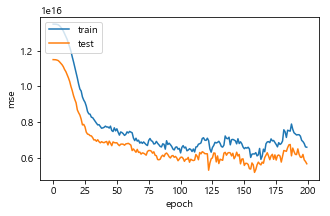

In [243]:
plt.figure(figsize=(5, 3))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])

plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [487]:
margin = xg_rg1.predict(seoul_test_X)
seoul_predict_value1 = margin + seoul_test["#security#"]

In [488]:
margin = xg_rg2.predict(busan_test_X)
busan_predict_value1 = margin + busan_test["#security#"]

In [489]:
len(busan_predict_value1)

296

In [490]:
len(seoul_predict_value1)

533

In [491]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)

submission = pd.concat([busan_predict_value1, seoul_predict_value1])

In [11]:
#submission = pd.DataFrame(submission)
#submission.head()

In [493]:
#submission.to_csv('./submission/submission10.csv', header= False, index= False)